# Exploratory Data Visualization with Bikes

In this small repository we will analyze bike sales, using Bike rental systems data. These bike rental systems are a new generation of transportation in big cities where the process of rental, membership, and returns have been automatic. 

Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

In this data analysis we will test the following hypothesis:
* Registered users tend to use the bikes more on working days — to commute to work probably. On the other side, casual users tend to rent the bikes more on the weekends and holidays — probably for some leisure time.

To corroborate or disprove these observations, we'll calculate the average number of rentals for casual and registered users on working and non-working days. 

### Exploring Casual vs Registered Users Patterns

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

bike_sharing = pd.read_csv('day.csv')
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])

We will be using the `dteday` column which is the `date` and the `workingday` column describes the type of day, `0` for nonworking day, and `1` for a working day. 

In [2]:
# We want to make sure that data we are using is valid so let's test the 
# amount of workingday values we have to equal a multiple of 365 for amount
# of days in a year, plus/minus 1 for leap years

bike_sharing['workingday'].value_counts()

1    500
0    231
Name: workingday, dtype: int64

So now that we can see the sum of these numbers are 731 which would include one year and a leap year—look clean and ready for use, let's continue with our analysis with an inital look at the correlation between the `workingday` column and the `casual` and `registered` user counts. 

In [3]:
bike_sharing.corr()['workingday'][['casual', 'registered']]

casual       -0.518044
registered    0.303907
Name: workingday, dtype: float64

Looking at these numbers we can see a negative correlation for `casual` users on working days, and an weak positive correlation for `registered` users on working days. 

To strengthen these conclusions we will calculate the average users for both types on these days to corroborate or disprove these observations. 

<function matplotlib.pyplot.show(close=None, block=None)>

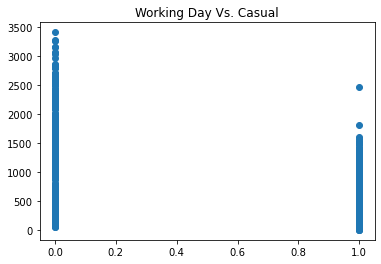

In [4]:
plt.scatter(bike_sharing['workingday'], bike_sharing['casual']) 
plt.title('Working Day Vs. Casual')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

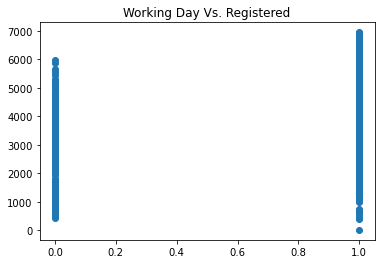

In [5]:
plt.scatter(bike_sharing['workingday'], bike_sharing['registered'])
plt.title('Working Day Vs. Registered') 
plt.show

On both of the plots, there is an opposing pattern, even with the usual sight of the plots as they're only two values accepted (0 vs 1) and suggesting that the two patterns for `registered` and `casual` users contrast as opposites. 

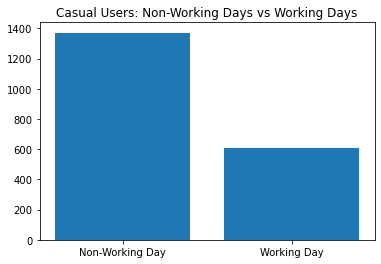

In [6]:
working_days = ['Non-Working Day', 'Working Day']
casual_avg = [1371, 607]

plt.bar(working_days, casual_avg)
plt.title('Casual Users: Non-Working Days vs Working Days')
plt.show()

Based on the above analysis, we found a pattern that is potentially true: registered users tend to use the bikes more on the working days, while casual users tend to rent the bikes more on the weekends and holidays.

We corroborated this hypothesis with the average number of rentals we see for casual and registered users on working and non-working days.

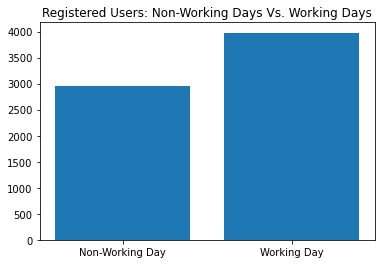

In [7]:
working_days = ['Non-Working Day', 'Working Day']
registered_avg = [2959, 3978]

plt.bar(working_days, registered_avg)
plt.title('Registered Users: Non-Working Days Vs. Working Days')
plt.show()

We can see that the data indicates that registered users tend to use the bikes more on working days, while casual users tend to rent the bikes more on weekends and holidays.

We can also take a more granular approach to analyzing the data and examine the average number of rentals for casual and registered users based on the day of the week (Monday, Tuesday, Wednesday, etc.).

The `weekday` column in our dataset describes the day of the week (`0` is Sunday, and `6` is Saturday):

In [8]:
# This will be the averages for each day of the week

weekday_averages = bike_sharing.groupby('weekday').mean()[['casual', 'registered']].reset_index()
print(weekday_averages)

   weekday       casual   registered
0        0  1338.295238  2890.533333
1        1   674.133333  3663.990476
2        2   556.182692  3954.480769
3        3   551.144231  3997.394231
4        4   590.961538  4076.298077
5        5   752.288462  3938.000000
6        6  1465.257143  3085.285714


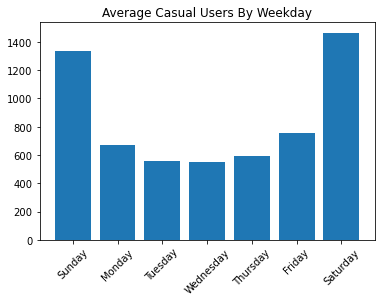

In [9]:
plt.bar(weekday_averages['weekday'], weekday_averages['casual'])
plt.title("Average Casual Users By Weekday")
plt.xticks(ticks=[0,1,2,3,4,5,6],
           labels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
           rotation = 45
          )
plt.show()

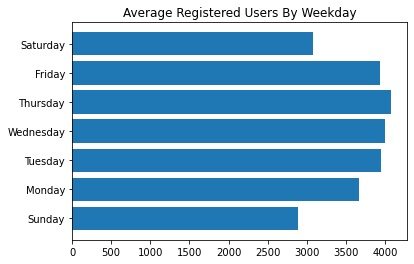

In [10]:
plt.barh(weekday_averages['weekday'], weekday_averages['registered'])
plt.title('Average Registered Users By Weekday')
plt.yticks(ticks=[0,1,2,3,4,5,6],
           labels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
          )
plt.show()

The plot looks like like it supports the observation that registered users do bike more on weekdays than they do on weekends, with Friday and Thursday being the most popular times. For casual users, the plot also shows a dramatic increase in casual users on Saturday and Sunday. 

### Exploring data on weather correlations with biking

Our dataset describes bike sharing activity for the Capital Bikeshare company in Washington, D.C. Let's say the company has decided to open up a new bike sharing system in another American city.

Weather patterns are going to play an important part in choosing the next location. We're asked to pull up some weather data about Washington, D.C. — the decision-making team wants to use that as a benchmark for evaluating other cities.

Here we will be using `weathersit`, which describes the daily weather type. Let's look at the unique values and the number of times each occurs:

* `1`: clear or few clouds
* `2`: mist or cloudy
* `3`: light rain, light snow, thunderstorm
* `4`: heavy rain, snow, ice pellets, fog

In [11]:
bike_sharing['weathersit'].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

In the last two years we can see outside of 21 days, Washington D.C. has enjoyed either cloudy or clear weather. 

In [12]:
# Now to keep our data simple, let's look at both of the years 
# 2011 and 2012 of our dataset individually 

year_weather1 = bike_sharing[bike_sharing['yr'] == 1] 
year_weather0 = bike_sharing[bike_sharing['yr'] == 0] 

year_weather1['weathersit'].value_counts().sort_index()

1    237
2    123
3      6
Name: weathersit, dtype: int64

In [13]:
year_weather0['weathersit'].value_counts().sort_index()

1    226
2    124
3     15
Name: weathersit, dtype: int64

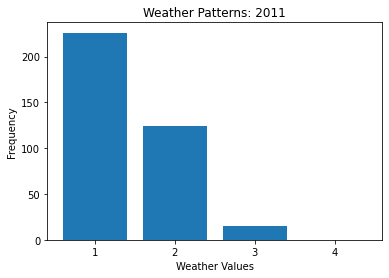

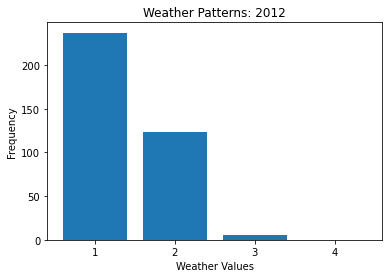

In [15]:
weather_values = [1,2,3,4]
weather_2012 = [237,123,6,0]
weather_2011 = [226,124,15,0]

plt.bar(weather_values, weather_2011)
plt.xticks(ticks=[1,2,3,4])
plt.title('Weather Patterns: 2011')
plt.ylabel('Frequency')
plt.xlabel('Weather Values')
plt.show()

plt.bar(weather_values, weather_2012)
plt.xticks(ticks=[1,2,3,4])
plt.title('Weather Patterns: 2012')
plt.ylabel('Frequency')
plt.xlabel('Weather Values')
plt.show()

Based on what we found, it looks like Washington D.C. shows consistent patterns for 2011 and 2012. 

In [16]:
# Bins allow us to tell the most popular and the most rare points of a frequency table

bike_sharing['cnt'].value_counts(bins=10)

(4368.0, 5237.2]    137
(3498.8, 4368.0]    122
(5237.2, 6106.4]     81
(6975.6, 7844.8]     79
(6106.4, 6975.6]     76
(2629.6, 3498.8]     73
(1760.4, 2629.6]     71
(891.2, 1760.4]      62
(7844.8, 8714.0]     17
(13.307, 891.2]      13
Name: cnt, dtype: int64

Now we can see most common counts sorted from most common to least common, we're going to change the sorting so we can find the outliers in these data counts. 

In [17]:
bike_sharing['cnt'].value_counts(bins=10).sort_index()

(13.307, 891.2]      13
(891.2, 1760.4]      62
(1760.4, 2629.6]     71
(2629.6, 3498.8]     73
(3498.8, 4368.0]    122
(4368.0, 5237.2]    137
(5237.2, 6106.4]     81
(6106.4, 6975.6]     76
(6975.6, 7844.8]     79
(7844.8, 8714.0]     17
Name: cnt, dtype: int64

Based on this data we can see that number of rentals under 891.2 are *extremely* rare, the values between 4368 and 5237 as a number of rentals are *most* common, while the number of rentals above 7845 are *extremely* rare as well. 

In [18]:
# Let's look for patterns between the casual and 
# registered users

registered_freq = bike_sharing["registered"].value_counts(bins = 10).sort_index()

casual_freq = bike_sharing["casual"].value_counts(bins = 10).sort_index()

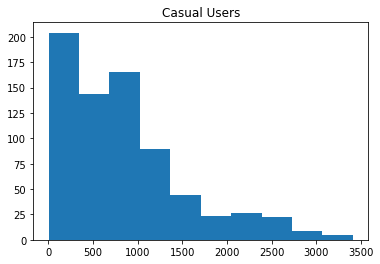

(-1.4089999999999998, 342.8]    204
(342.8, 683.6]                  144
(683.6, 1024.4]                 165
(1024.4, 1365.2]                 89
(1365.2, 1706.0]                 44
(1706.0, 2046.8]                 23
(2046.8, 2387.6]                 26
(2387.6, 2728.4]                 22
(2728.4, 3069.2]                  9
(3069.2, 3410.0]                  5
Name: casual, dtype: int64


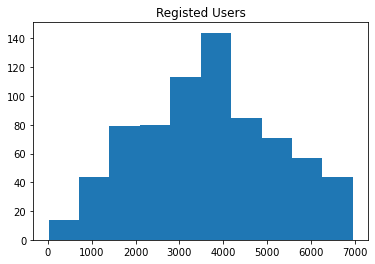

(13.073, 712.6]      14
(712.6, 1405.2]      44
(1405.2, 2097.8]     79
(2097.8, 2790.4]     80
(2790.4, 3483.0]    113
(3483.0, 4175.6]    144
(4175.6, 4868.2]     85
(4868.2, 5560.8]     71
(5560.8, 6253.4]     57
(6253.4, 6946.0]     44
Name: registered, dtype: int64


In [20]:
plt.hist(bike_sharing["casual"])
plt.title("Casual Users")
plt.show()

print(casual_freq)

plt.hist(bike_sharing["registered"])
plt.title("Registed Users")
plt.show()

print(registered_freq)

As we can see the `Casual Users` histogram is more positively skewed left compared to a more normal distribution for `Registered Users`. 

* Most typically the approximate range for `Casual Users` is 0 to 3500 and for the range of `Registered Users` the range is 0 to 7000. 
* For `Casual Users` the highest interval is less than 343, the highest interval for `Registered Users` is between 3483 and 4176. 
* The lowest interval for `Casual Users` is between 13 and 712 users, the lowest interval for `Registered Users` is between 3069 and 3410. 

## Conclusions

Registered users have a stickier distribution than casual users, with casual users being more skewed to the left having a lower `cnt` with a higher frequency. We also found that registered users have a higher base towards the weekdays, with casual users having a higher frequency towards the weekend. This data is limited, but if we were to make some possiblities to grow revenue and profit margins some **inital** solutions would be the following:
* Creating a discount for users to get registered on the weekend 
* Opening a new location in a geographic that has an 2-year average of at least 97% clear/cloudy weather
* Increasing bike locations near offices and business districts 